In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_boston

## The data
To visualize these statical tools, the famous Iris flower and Boston housing datasets have been loaded in from sklearn.

In [9]:
data_dictionary = load_iris()
iris_data = data_dictionary['data']
iris_features = data_dictionary['feature_names']

In [10]:
data_dictionary = load_boston()
boston_data = data_dictionary['data']
boston_features = data_dictionary['feature_names']

## Descriptive Statistics
Simple, but useful stats for interpreting your data right off the start

In [11]:
def descriptive_stats(data, features):
    stats = np.zeros((data.shape[1], 4))
    for i in range(stats.shape[0]):
        subset = data[:, i]
        stats[i, 0] = subset.shape[0]
        stats[i, 1] = np.mean(subset)
        stats[i, 2] = np.std(subset)
        stats[i, 3] = np.var(subset)
    
    stats = pd.DataFrame(stats, columns = ['N', 'Mean', 'Stdev', 'Var'], index = features)
    
    return stats

In [12]:
descriptive_stats(iris_data, iris_features)

,N,Mean,Stdev,Var
sepal length (cm),150.0,5.843333,0.825301,0.681122
sepal width (cm),150.0,3.057333,0.434411,0.188713
petal length (cm),150.0,3.758000,1.759404,3.095503
petal width (cm),150.0,1.199333,0.759693,0.577133


## Scatter Plot
In order to visualize multidimensional data, we can plot feature i against feature j for all features 

In [13]:
def scatter_plot_matrix(data, features):
    fig, axs = plt.subplots(4, 4)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            if i != j:
                axs[i, j].scatter(data[:, i], data[:, j])
                axs[i, j].set_title(features[i][:-5] + " vs " + features[j][:-5])
            else:
                axs[i, j].hist(data[:, i], bins=16, color='skyblue') 
                axs[i, j].set_title("Distribution of " + features[j][:-5])

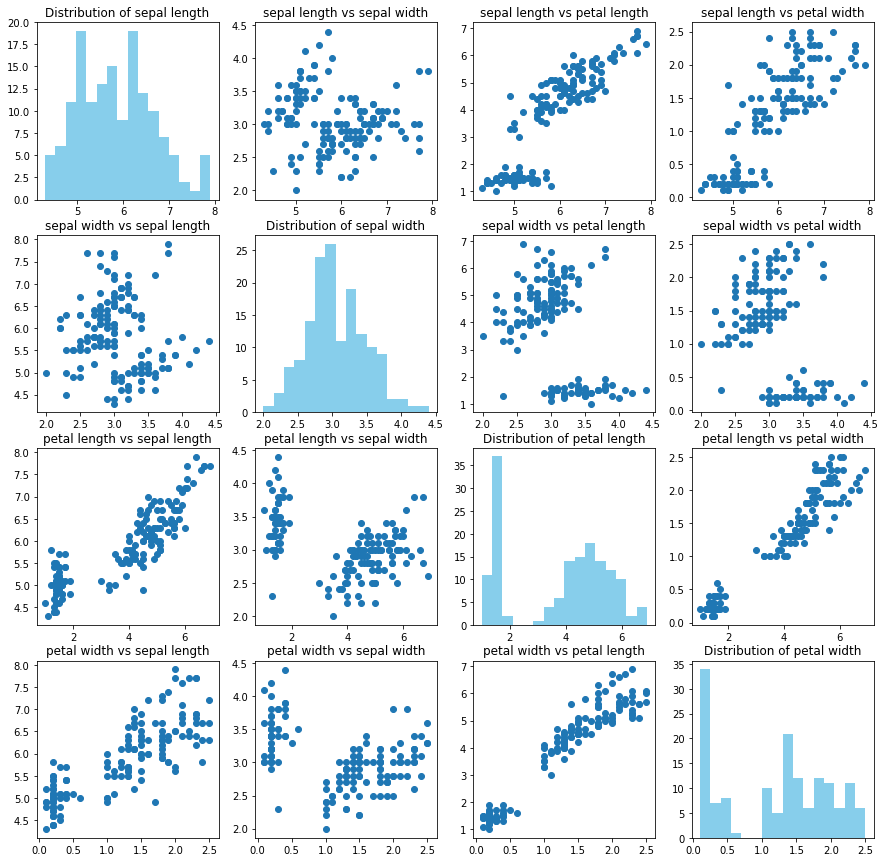

In [14]:
scatter_plot_matrix(iris_data, iris_features)

## Covarience
We can determine whether or not a set of features change together

In [15]:
def cov(x, y):
    return np.sum(np.dot(x - np.mean(x), y - np.mean(y))) / (len(x))

In [16]:
def covarience_matrix(data, features):
    covarence = np.zeros((data.shape[1], data.shape[1]))
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            x = data[:, i]
            y = data[:, j]
            covarence[i, j] = cov(x, y)
            
    return pd.DataFrame(covarence, index=features, columns=features).astype('float').round(2)

In [17]:
covarience_matrix(boston_data, boston_features)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,73.84,-40.14,23.94,-0.12,0.42,-1.32,85.24,-6.86,46.76,843.15,5.39,-301.78,27.93
ZN,-40.14,542.86,-85.24,-0.25,-1.39,5.10,-373.16,32.56,-63.22,-1234.01,-19.74,372.98,-68.65
INDUS,23.94,-85.24,46.97,0.11,0.61,-1.88,124.27,-10.21,35.48,831.71,5.68,-223.14,29.52
CHAS,-0.12,-0.25,0.11,0.06,0.00,0.02,0.62,-0.05,-0.02,-1.52,-0.07,1.13,-0.10
NOX,0.42,-1.39,0.61,0.00,0.01,-0.02,2.38,-0.19,0.62,13.02,0.05,-4.01,0.49
RM,-1.32,5.10,-1.88,0.02,-0.02,0.49,-4.74,0.30,-1.28,-34.52,-0.54,8.20,-3.07
AGE,85.24,-373.16,124.27,0.62,2.38,-4.74,790.79,-44.24,111.55,2397.94,15.91,-701.55,120.84
DIS,-6.86,32.56,-10.21,-0.05,-0.19,0.30,-44.24,4.43,-9.05,-189.29,-1.06,55.93,-7.46
RAD,46.76,-63.22,35.48,-0.02,0.62,-1.28,111.55,-9.05,75.67,1333.12,8.74,-352.58,30.33
TAX,843.15,-1234.01,831.71,-1.52,13.02,-34.52,2397.94,-189.29,1333.12,28348.62,167.82,-6784.48,653.42


## Correlation
We can examine the direction and to what degree a set a features effect one another

In [18]:
def corr(x, y):
    return cov(x, y) / (np.std(x) * np.std(y))

In [19]:
def correlation_matrix(data, features):
    correlation = np.zeros((data.shape[1], data.shape[1])).astype('float16')
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            x = data[:, i]
            y = data[:, j]
            correlation[i, j] = corr(x, y)
            
    return pd.DataFrame(correlation, index=features, columns=features).astype('float').round(3)

In [20]:
correlation_matrix(boston_data, boston_features)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000,-0.200,0.406,-0.056,0.421,-0.219,0.353,-0.380,0.625,0.583,0.290,-0.385,0.456
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.569,0.665,-0.312,-0.314,-0.392,0.176,-0.413
INDUS,0.406,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.355,0.128,-0.614
AGE,0.353,-0.569,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.261,-0.273,0.603
DIS,-0.380,0.665,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.535,-0.232,0.292,-0.497
RAD,0.625,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489
TAX,0.583,-0.314,0.721,-0.036,0.668,-0.292,0.506,-0.535,0.910,1.000,0.461,-0.442,0.544
